<a href="https://colab.research.google.com/github/sbogde/scikit-regressions-and-confessions/blob/main/week3_01_svr_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor

In [4]:
# Check if running in Google Colab
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive')
    file_path = '/content/drive/My Drive/Colab Notebooks/50_Startups.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './50_Startups.csv'  # Local path

Mounted at /content/drive


In [5]:
dataset = pd.read_csv(file_path)

In [6]:
# dataset.head()

In [7]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


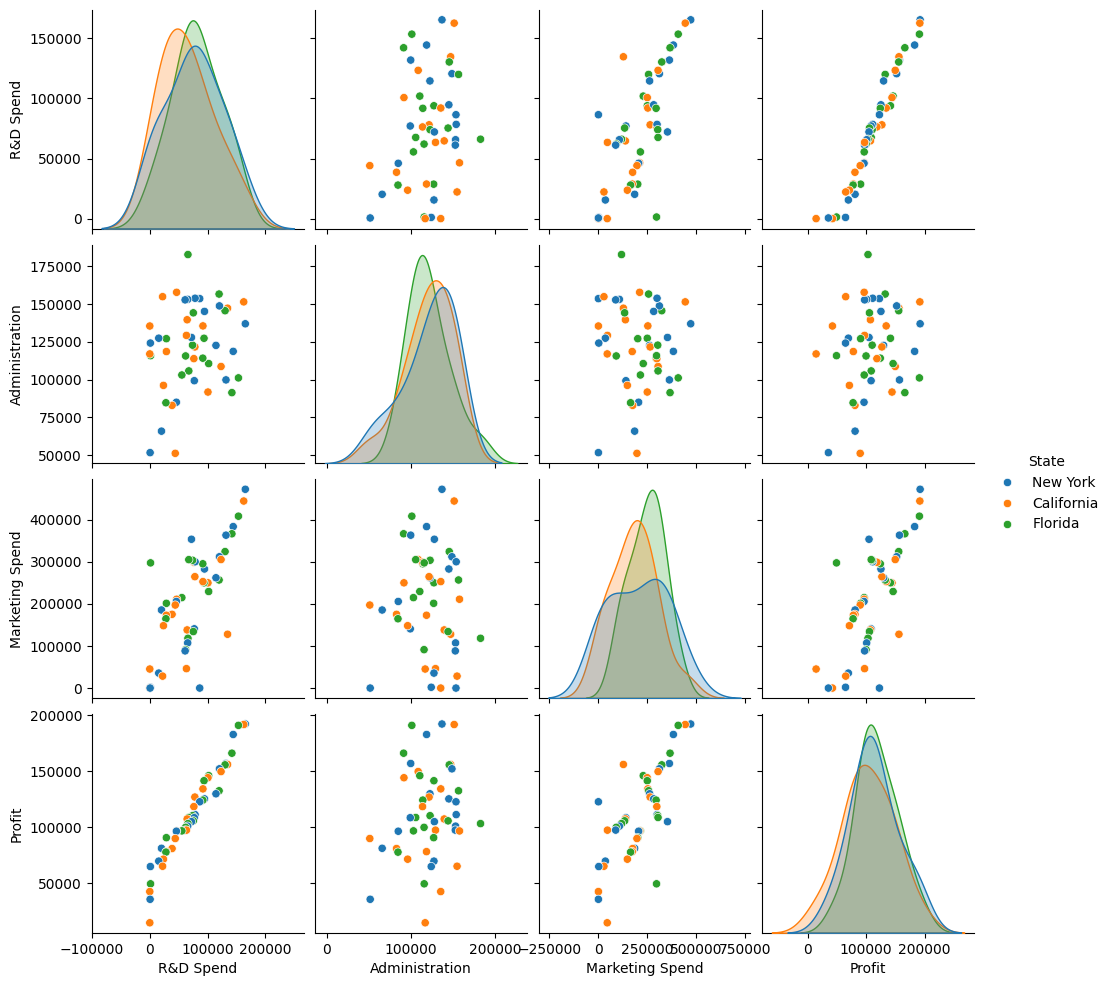

In [8]:
sns.pairplot(dataset, hue='State')
plt.show()

In [9]:
X = dataset.iloc[ : , :4]
Y = dataset.iloc[ : , 4]

In [10]:
states = pd.get_dummies(X['State'])

In [11]:
X = X.drop('State', axis =1)

In [12]:
x=pd.concat([X, states], axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
# 0.9445
# regressor = LinearRegression()
# -0.41396 !s
# regressor = SVR()
# 0.9162
# regressor = SVR(kernel='linear')
# 0.9324
# regressor = SVR(kernel='linear', C=0.5)
# 0.943145
# regressor = SVR(kernel='linear', C=0.1)
# 0.953717
regressor = SVR(kernel='linear', C=0.15)
# 0.949361
# regressor = SVR(kernel='linear', C=0.2)

# 0.94304
# regressor = SVR(kernel='linear', C=0.01)

regressor.fit(X_train, y_train)

SVR(C=0.15, kernel='linear')

In [25]:
predictions = regressor.predict(X_test)

In [26]:
print(predictions)
print(y_test)

[104393.35329738 134079.09078487 134756.10054686  73976.1251927
 180902.62888541]
28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
Name: Profit, dtype: float64


In [27]:
r_square = metrics.r2_score(y_test, predictions)
print(r_square)

0.9537179078205151
